# 6.3 学習曲線と検証曲線によるアルゴリズムの診断
- 学習アルゴリズムの性能を向上させるのに役立つ学習曲線と検証曲線を取り上げる。

# 6.3.1 学習曲線を使ってバイアスとバリアンスの問題を診断する
- 過学習を抑えるためにトレーニングサンプルをたくさん集める事が役立つ事があるが、一般にそのコストは高い。
- バイアスが高いモデルでは、トレーニングと交差検証の正解率が低く、学習不足である。この問題に対処する一般的な方法は、モデルのパラメータを増やすことである。例えば、追加する特徴量を収集または生成するか、SVMやロジスティック回帰の分類器で正則化の強度を下げる必要がある。
- バリアンスが高いモデルでは、トレーニングと交差検証の精度に大きな差がある場合である。トレーニングデータを更に増やすか、正則化のパラメータを増やすなどして、モデルの複雑さを抑えれば良い。正則化されたいなモデルでは特徴量の個数を減らすのも効果的である。

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)

In [4]:
#特徴量をX、ターゲットをyに格納
from sklearn.preprocessing import LabelEncoder
import numpy as np
X = df.loc[:,2:].values
y = df.loc[:,1].values
#クラスラベルの文字列表現を整数に変換する
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
#トレーニングデータセットとテストデータセットに分割する
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

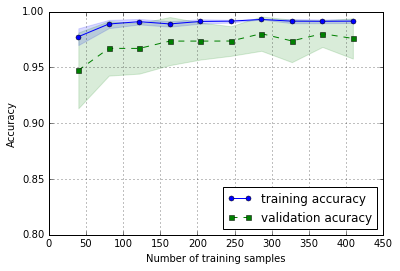

In [15]:
#scikit-learnで学習曲線関数を使ってモデルを評価する方法
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

#learning_curveを使って交差検証による正解率を算出
train_sizes,train_scores,test_scores = learning_curve(estimator=pipe_lr,
                                                      X=X_train,y=y_train,
                                                      train_sizes=np.linspace(0.1,1.0,10),
                                                      cv=10,
                                                      n_jobs=1)
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
#fill_between関数で平均+-標準偏差の幅を塗りつぶす。
#トレーニングデータのサイズtrain_sizes,透明度alpha,カラーblueを引数に指定
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15,color='blue')

plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation acuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8,1.0])
plt.show()

In [25]:
np.linspace(0.1,1.0,10)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])